In [36]:
import sklearn
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from fomlads.evaluate.eval_regression import train_and_test_partition
from fomlads.evaluate.eval_regression import train_and_test_filter
from fomlads.evaluate.eval_regression import create_cv_folds

In [37]:
dataset = pd.read_csv('./Data/Used Dataset.csv')

In [38]:
# Produce inputs and target from dataset

number_of_columns = 14
inputs = dataset.iloc[:, 0:13].to_numpy()
targets = dataset['track_genre'].to_numpy()
print(inputs)
print(targets)

[[4.40000e+01 6.21000e-03 7.11000e-01 ... 3.82000e-02 1.42065e+02
  6.07000e-01]
 [3.40000e+01 3.47000e-01 7.29000e-01 ... 1.84000e-01 7.99690e+01
  2.87000e-01]
 [3.90000e+01 9.18000e-01 4.84000e-01 ... 3.46000e-02 8.27070e+01
  2.06000e-01]
 ...
 [5.10000e+01 5.97000e-03 6.93000e-01 ... 1.46000e-01 1.31079e+02
  3.95000e-01]
 [6.50000e+01 8.31000e-02 7.82000e-01 ... 4.41000e-02 7.58860e+01
  3.54000e-01]
 [6.70000e+01 1.02000e-01 8.62000e-01 ... 1.01000e-01 9.92010e+01
  7.65000e-01]]
['Jazz' 'Jazz' 'Jazz' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']


In [39]:
# Split the dataset into training + validation data and testing data

train_filter, test_filter = train_and_test_filter(len(dataset))

train_validation_inputs, train_validation_targets, test_inputs, test_targets = train_and_test_partition(inputs, targets, train_filter, test_filter)

In [40]:
# Partition the training + validation data into training data and validation data

N = len(dataset)
number_of_folds = 4
random_seed = 1
np.random.seed(random_seed)
folds = create_cv_folds(N, number_of_folds)  

train_inputs = []
train_targets = []
validation_inputs = []
validation_targets = []

for i in range(number_of_folds):
    train_inputs1, train_targets1, validation_inputs1, validation_targets1 = train_and_test_partition(inputs, targets, folds[i][0], folds[i][1])
    train_inputs.append(train_inputs1)
    train_targets.append(train_targets1)
    validation_inputs.append(validation_inputs1)
    validation_targets.append(validation_targets1)
    
print(train_inputs)
print(train_targets)
print(validation_inputs)
print(validation_targets)

# Their lengths should be the same as the number of folds

print(len(train_inputs))
print(len(train_targets))
print(len(validation_inputs))
print(len(validation_targets))

[array([[4.40000e+01, 6.21000e-03, 7.11000e-01, ..., 3.82000e-02,
        1.42065e+02, 6.07000e-01],
       [3.40000e+01, 3.47000e-01, 7.29000e-01, ..., 1.84000e-01,
        7.99690e+01, 2.87000e-01],
       [3.60000e+01, 3.45000e-02, 4.73000e-01, ..., 6.30000e-02,
        1.04694e+02, 3.83000e-01],
       ...,
       [5.90000e+01, 3.34000e-02, 9.13000e-01, ..., 2.98000e-01,
        9.80280e+01, 3.30000e-01],
       [7.20000e+01, 1.57000e-01, 7.09000e-01, ..., 5.50000e-02,
        1.22043e+02, 1.13000e-01],
       [6.50000e+01, 8.31000e-02, 7.82000e-01, ..., 4.41000e-02,
        7.58860e+01, 3.54000e-01]]), array([[3.90000e+01, 9.18000e-01, 4.84000e-01, ..., 3.46000e-02,
        8.27070e+01, 2.06000e-01],
       [3.60000e+01, 3.45000e-02, 4.73000e-01, ..., 6.30000e-02,
        1.04694e+02, 3.83000e-01],
       [6.30000e+01, 6.99000e-01, 5.80000e-01, ..., 2.69000e-02,
        9.30370e+01, 3.64000e-01],
       ...,
       [5.10000e+01, 5.97000e-03, 6.93000e-01, ..., 1.46000e-01,
        

In [41]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#                             min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
#                             class_weight=None, ccp_alpha=0.0, max_samples=None)

# Here we only discuss the parameter: n_estimator
# n_estimator: number of the tree (from 1 to 50)
list_n_estimators = [n+1 for n in range(50)]
mean_accuracies_rf = []

for parameter in list_n_estimators:
    accuracy_fold = []
    for i in range(number_of_folds):
        Mod_rf = RandomForestClassifier(n_estimators=parameter)
        Mod_rf.fit(train_inputs[i], train_targets[i])
        predict_targets = Mod_rf.predict(validation_inputs[i])
        accuracy_for_fold_i = accuracy_score(validation_targets[i], predict_targets)
        accuracy_fold.append(accuracy_for_fold_i)
    mean_accuracy_fold = np.mean(accuracy_fold)
    mean_accuracies_rf.append(mean_accuracy_fold)

print(mean_accuracies_rf)

[0.6796971843456702, 0.670223127324243, 0.7271117407472996, 0.7426066938197273, 0.7530989906144856, 0.7619975208075084, 0.7698778112272002, 0.7724012750132814, 0.7754559943332743, 0.7770054896405171, 0.7807685496723924, 0.7843102532318045, 0.7851514078271649, 0.785638392066584, 0.7860368337170179, 0.7866566318399151, 0.791615016823092, 0.7872764299628121, 0.7928988843633787, 0.7898441650433858, 0.7927217991854081, 0.7921462723570037, 0.7936957676642465, 0.7946697361430849, 0.7930316982468567, 0.7935629537807686, 0.7932973260138128, 0.7947582787320702, 0.7948468213210554, 0.7968390295732247, 0.7980343545245263, 0.7958650610943864, 0.7949353639100407, 0.7981671684080042, 0.7972374712236586, 0.7975030989906144, 0.7975916415795998, 0.7974588276961219, 0.7986098813529308, 0.7980343545245263, 0.8002921905436515, 0.7995838498317691, 0.7990525942978572, 0.7982999822914822, 0.7986098813529308, 0.7991854081813352, 0.799982291482203, 0.7994067646537985, 0.8025942978572693, 0.8006463608995926]


Text(0.5, 1.0, 'Accuracy and the corresponding n_estimator')

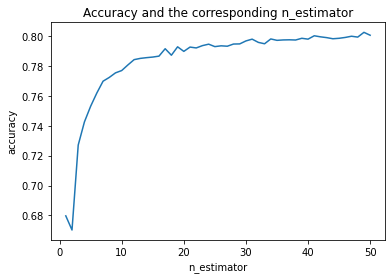

In [42]:
# Plot the accuracies
plt.figure()
plt.plot(list_n_estimators, mean_accuracies_rf, '-')
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.title('Accuracy and the corresponding n_estimator')

In [35]:
#ma_rf_mean = np.mean(mean_accuracies_rf)
#ma_rf_std = np.std(mean_accuracies_rf, ddof=1)
#mean_accuracies_rf_normal = (np.array(mean_accuracies_rf) - ma_rf_mean) / ma_rf_std
#plt.figure()
#plt.plot(list_n_estimators, mean_accuracies_rf_normal, '-')

In [29]:
# Find the highest accuracy and the corresponding n_estimator
best_index = np.argmax(np.array(mean_accuracies_rf))
best_n_estimator = best_index + 1
print(best_n_estimator)

48


In [30]:
# Invoke function again with the best n_estimator
Mod_rf2 = RandomForestClassifier(n_estimators=best_n_estimator)
Mod_rf2.fit(train_validation_inputs, train_validation_targets) 
predict_targets2 = Mod_rf2.predict(test_inputs)
accuracy = accuracy_score(test_targets, predict_targets2)
print(accuracy)

0.7941073307611365
